Ion Beam
========

In [1]:
import os
import sys
phare_root = os.path.expanduser("~/codes/far/PHARE/")
sys.path.append(os.path.join(phare_root, "pyphare"))
from pyphare.pharesee.run import Run

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as gf
from numpy import polyfit
from scipy.signal import find_peaks
%matplotlib widget

In [4]:
root_path = "/home/smets/FluKi/2024/run/beam"

In [6]:
path = root_path+"/"+"ib1"
r = Run(path)

In [8]:
time=0
main = r.GetParticles(time, ["main",])

In [10]:
print(type(main))

<class 'pyphare.pharesee.hierarchy.PatchHierarchy'>


In [ ]:
# zob = main.dist_plot()

In [13]:
def new_dist_plot(self, **kwargs):
    """
    plot phase space of a particle hierarchy
    """
    import copy

    # from .plotting import dist_plot as dp
    from pyphare.pharesee.plotting import dist_plot as dp

    usr_lvls = kwargs.get("levels", (0,))
    finest = kwargs.get("finest", False)
    pops = kwargs.get("pop", [])
    time = kwargs.get("time", self.times()[0])
    axis = kwargs.get("axis", ("Vx", "Vy"))
    all_pops = list(self.level(0, time).patches[0].patch_datas.keys())

    vmin = kwargs.get("vmin", -2)
    vmax = kwargs.get("vmax", 2)
    dv = kwargs.get("dv", 0.05)
    vbins = vmin + dv * np.arange(int((vmax - vmin) / dv))

    if finest:
        final = finest_part_data(self)
        if axis[0] == "x":
            xbins = amr_grid(self, time)
            bins = (xbins, vbins)
        else:
            bins = (vbins, vbins)
        kwargs["bins"] = bins

    else:
        final = {pop: None for pop in all_pops}
        for lvl_nbr, level in self.levels(time).items():
            if lvl_nbr not in usr_lvls:
                continue
            for ip, patch in enumerate(level.patches):
                if len(pops) == 0:
                    pops = list(patch.patch_datas.keys())

                for pop in pops:
                    tmp = copy.copy(patch.patch_datas[pop].dataset)

                    if final[pop] is None:
                        final[pop] = tmp
                    else:
                        final[pop].add(tmp)

    # select particles
    if "select" in kwargs:
        for pop, particles in final.items():
            final[pop] = kwargs["select"](particles)

    return final, dp(final, **kwargs)

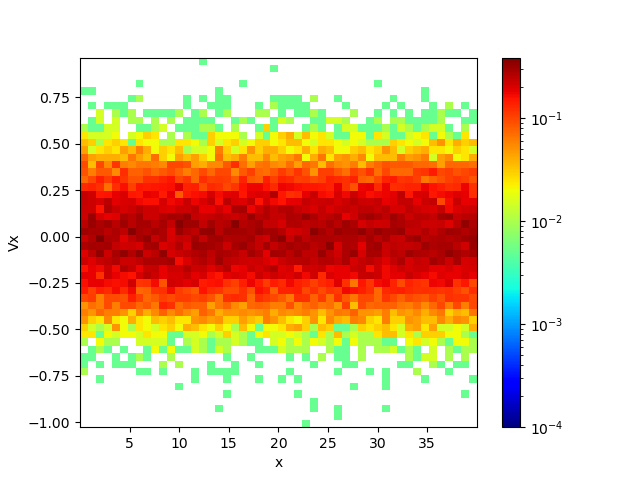

In [15]:
zob = new_dist_plot(main, axis=("x", "Vx"))

In [18]:
print(zob.get("main_domain"])

TypeError: tuple indices must be integers or slices, not str